# Tutorial de Visualización de Datos 📊

En este tutorial aprenderás:
- Introducción a matplotlib y seaborn
- Tipos de gráficos y cuándo usar cada uno
- Personalización de visualizaciones
- Gráficos estadísticos avanzados
- Dashboards simples con subplots
- Mejores prácticas para visualización

**Librerías principales**:
- 📈 **Matplotlib**: Librería base para visualización
- 🎨 **Seaborn**: Visualizaciones estadísticas hermosas
- 📊 **Pandas plotting**: Integración directa con DataFrames

**Objetivos de aprendizaje**:
1. 🎯 **Elegir el gráfico correcto** para cada tipo de datos
2. 🎨 **Personalizar visualizaciones** para que sean claras y atractivas
3. 📊 **Crear dashboards** informativos con múltiples gráficos
4. 📈 **Contar historias** efectivas con datos

In [1]:
# Instalación e importación de librerías

# Para instalar las librerías necesarias, ejecuta en terminal:
# pip install matplotlib seaborn pandas numpy

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Configuración para mejorar la apariencia de los gráficos
plt.style.use('seaborn-v0_8')  # Estilo más moderno
sns.set_palette("husl")        # Paleta de colores atractiva

# Configuración para mostrar gráficos en el notebook
%matplotlib inline

# Configurar el tamaño de fuente por defecto
plt.rcParams.update({'font.size': 10})

print("✅ Librerías de visualización importadas correctamente")
print(f"Matplotlib version: {plt.matplotlib.__version__}")
print(f"Seaborn version: {sns.__version__}")
print(f"Pandas version: {pd.__version__}")

# Crear datos de ejemplo (simulando el dataset del Titanic)
np.random.seed(42)  # Para reproducibilidad

def crear_datos_ejemplo():
    """Crea un dataset de ejemplo basado en el Titanic."""
    n_samples = 800
    
    datos = {
        'Survived': np.random.choice([0, 1], n_samples, p=[0.62, 0.38]),
        'Pclass': np.random.choice([1, 2, 3], n_samples, p=[0.24, 0.21, 0.55]),
        'Sex': np.random.choice(['male', 'female'], n_samples, p=[0.65, 0.35]),
        'Age': np.random.normal(29, 14, n_samples).round(1),
        'Fare': np.random.lognormal(3, 1, n_samples).round(2),
        'Embarked': np.random.choice(['S', 'C', 'Q'], n_samples, p=[0.72, 0.19, 0.09])
    }
    
    # Hacer que la supervivencia sea más realista basada en sexo y clase
    df = pd.DataFrame(datos)
    
    # Ajustar supervivencia basada en sexo (las mujeres tenían mayor probabilidad)
    mask_female = df['Sex'] == 'female'
    df.loc[mask_female, 'Survived'] = np.random.choice([0, 1], mask_female.sum(), p=[0.25, 0.75])
    
    # Ajustar supervivencia basada en clase (primera clase mayor probabilidad)
    mask_first_class = df['Pclass'] == 1
    df.loc[mask_first_class, 'Survived'] = np.random.choice([0, 1], mask_first_class.sum(), p=[0.37, 0.63])
    
    # Introducir algunos valores faltantes
    df.loc[np.random.choice(df.index, 50), 'Age'] = np.nan
    
    return df

# Crear el dataset
df = crear_datos_ejemplo()
print(f"\n📊 Dataset creado: {df.shape[0]} filas, {df.shape[1]} columnas")
print(f"Columnas: {list(df.columns)}")

# Vista previa
print(f"\n🔍 Primeras filas del dataset:")
print(df.head())

✅ Librerías de visualización importadas correctamente
Matplotlib version: 3.10.5
Seaborn version: 0.13.2
Pandas version: 2.3.2

📊 Dataset creado: 800 filas, 6 columnas
Columnas: ['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked']

🔍 Primeras filas del dataset:
   Survived  Pclass   Sex   Age   Fare Embarked
0         0       3  male   NaN  28.49        Q
1         1       1  male   NaN   4.20        S
2         1       3  male   5.4  22.09        Q
3         0       3  male  17.7  15.43        S
4         0       2  male  42.5  39.61        S


=== GRÁFICOS BÁSICOS CON MATPLOTLIB ===



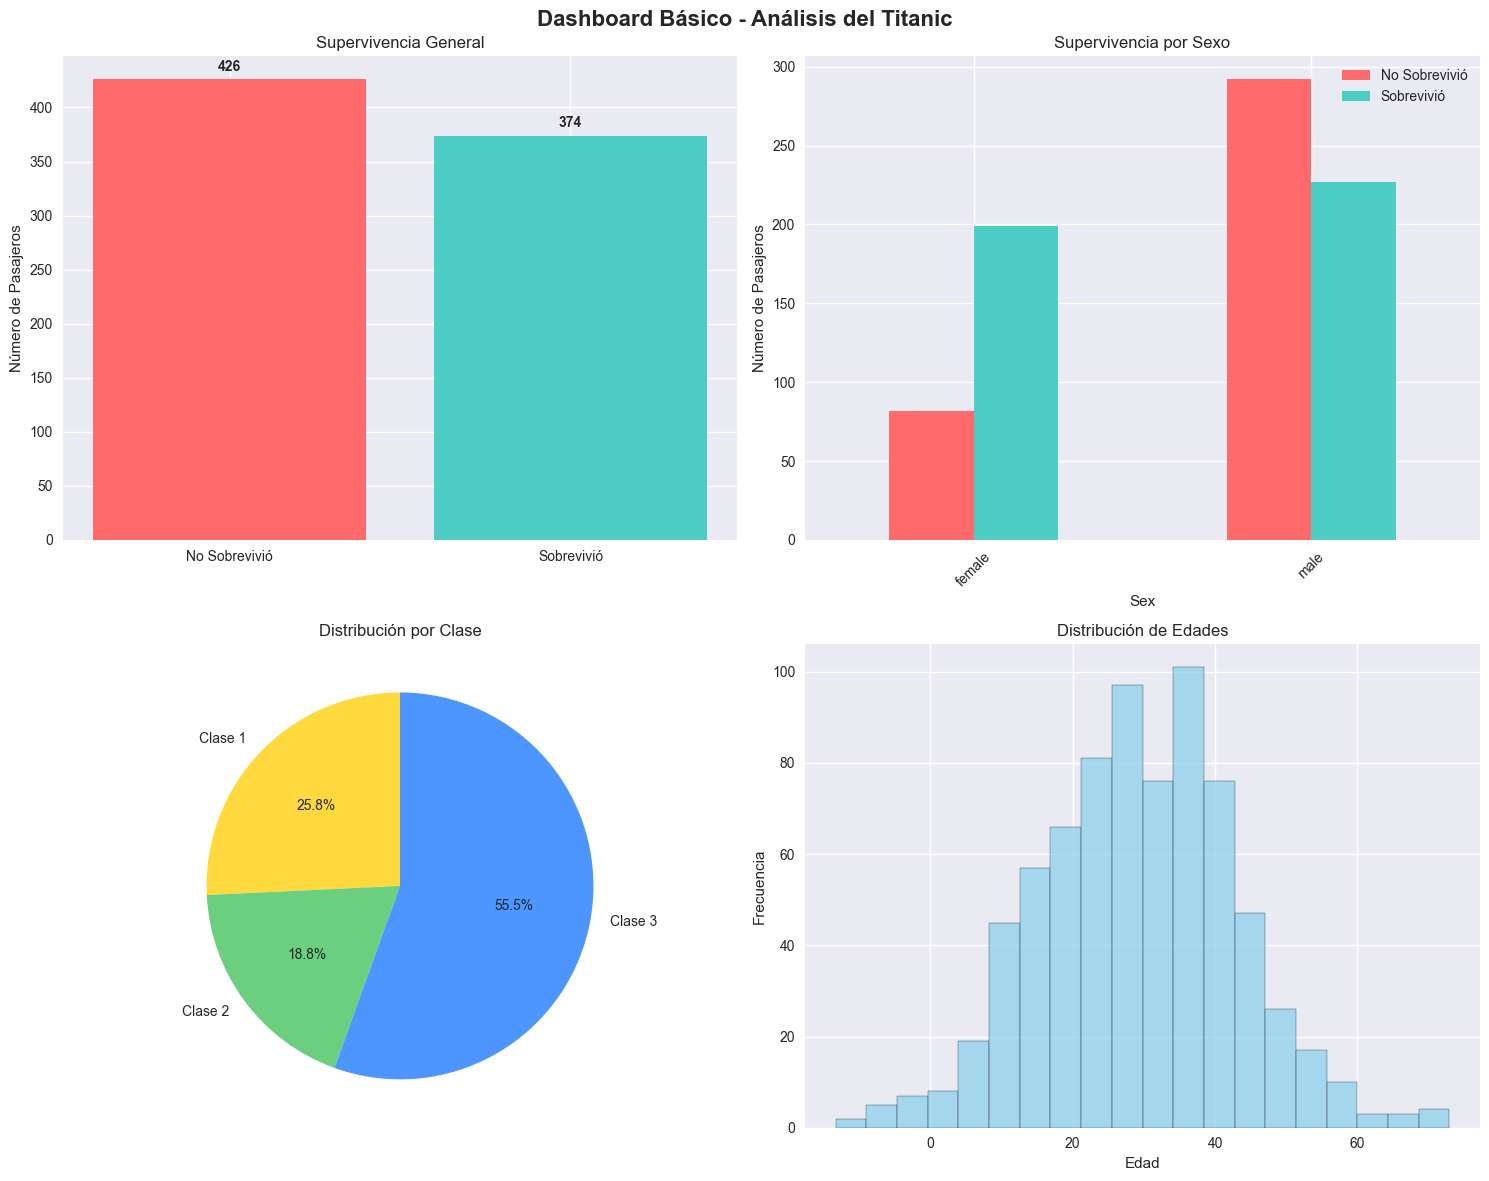

✅ Dashboard básico creado con matplotlib


In [2]:
# Gráficos Básicos con Matplotlib

print("=== GRÁFICOS BÁSICOS CON MATPLOTLIB ===\n")

# 1. Gráfico de barras - Supervivencia
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Dashboard Básico - Análisis del Titanic', fontsize=16, fontweight='bold')

# Gráfico 1: Supervivencia general
supervivencia = df['Survived'].value_counts()
axes[0,0].bar(['No Sobrevivió', 'Sobrevivió'], supervivencia.values, 
              color=['#ff6b6b', '#4ecdc4'])
axes[0,0].set_title('Supervivencia General')
axes[0,0].set_ylabel('Número de Pasajeros')

# Agregar valores en las barras
for i, v in enumerate(supervivencia.values):
    axes[0,0].text(i, v + 5, str(v), ha='center', va='bottom', fontweight='bold')

# Gráfico 2: Supervivencia por sexo
supervivencia_sexo = pd.crosstab(df['Sex'], df['Survived'])
supervivencia_sexo.plot(kind='bar', ax=axes[0,1], color=['#ff6b6b', '#4ecdc4'])
axes[0,1].set_title('Supervivencia por Sexo')
axes[0,1].set_ylabel('Número de Pasajeros')
axes[0,1].legend(['No Sobrevivió', 'Sobrevivió'])
axes[0,1].tick_params(axis='x', rotation=45)

# Gráfico 3: Distribución por clase
clase_dist = df['Pclass'].value_counts().sort_index()
axes[1,0].pie(clase_dist.values, labels=[f'Clase {i}' for i in clase_dist.index], 
              autopct='%1.1f%%', startangle=90, colors=['#ffd93d', '#6bcf7f', '#4d96ff'])
axes[1,0].set_title('Distribución por Clase')

# Gráfico 4: Histograma de edad
df['Age'].dropna().hist(ax=axes[1,1], bins=20, color='skyblue', alpha=0.7, edgecolor='black')
axes[1,1].set_title('Distribución de Edades')
axes[1,1].set_xlabel('Edad')
axes[1,1].set_ylabel('Frecuencia')

# Ajustar espaciado
plt.tight_layout()
plt.show()

print("✅ Dashboard básico creado con matplotlib")

=== VISUALIZACIONES AVANZADAS CON SEABORN ===



<Figure size 1500x1200 with 0 Axes>

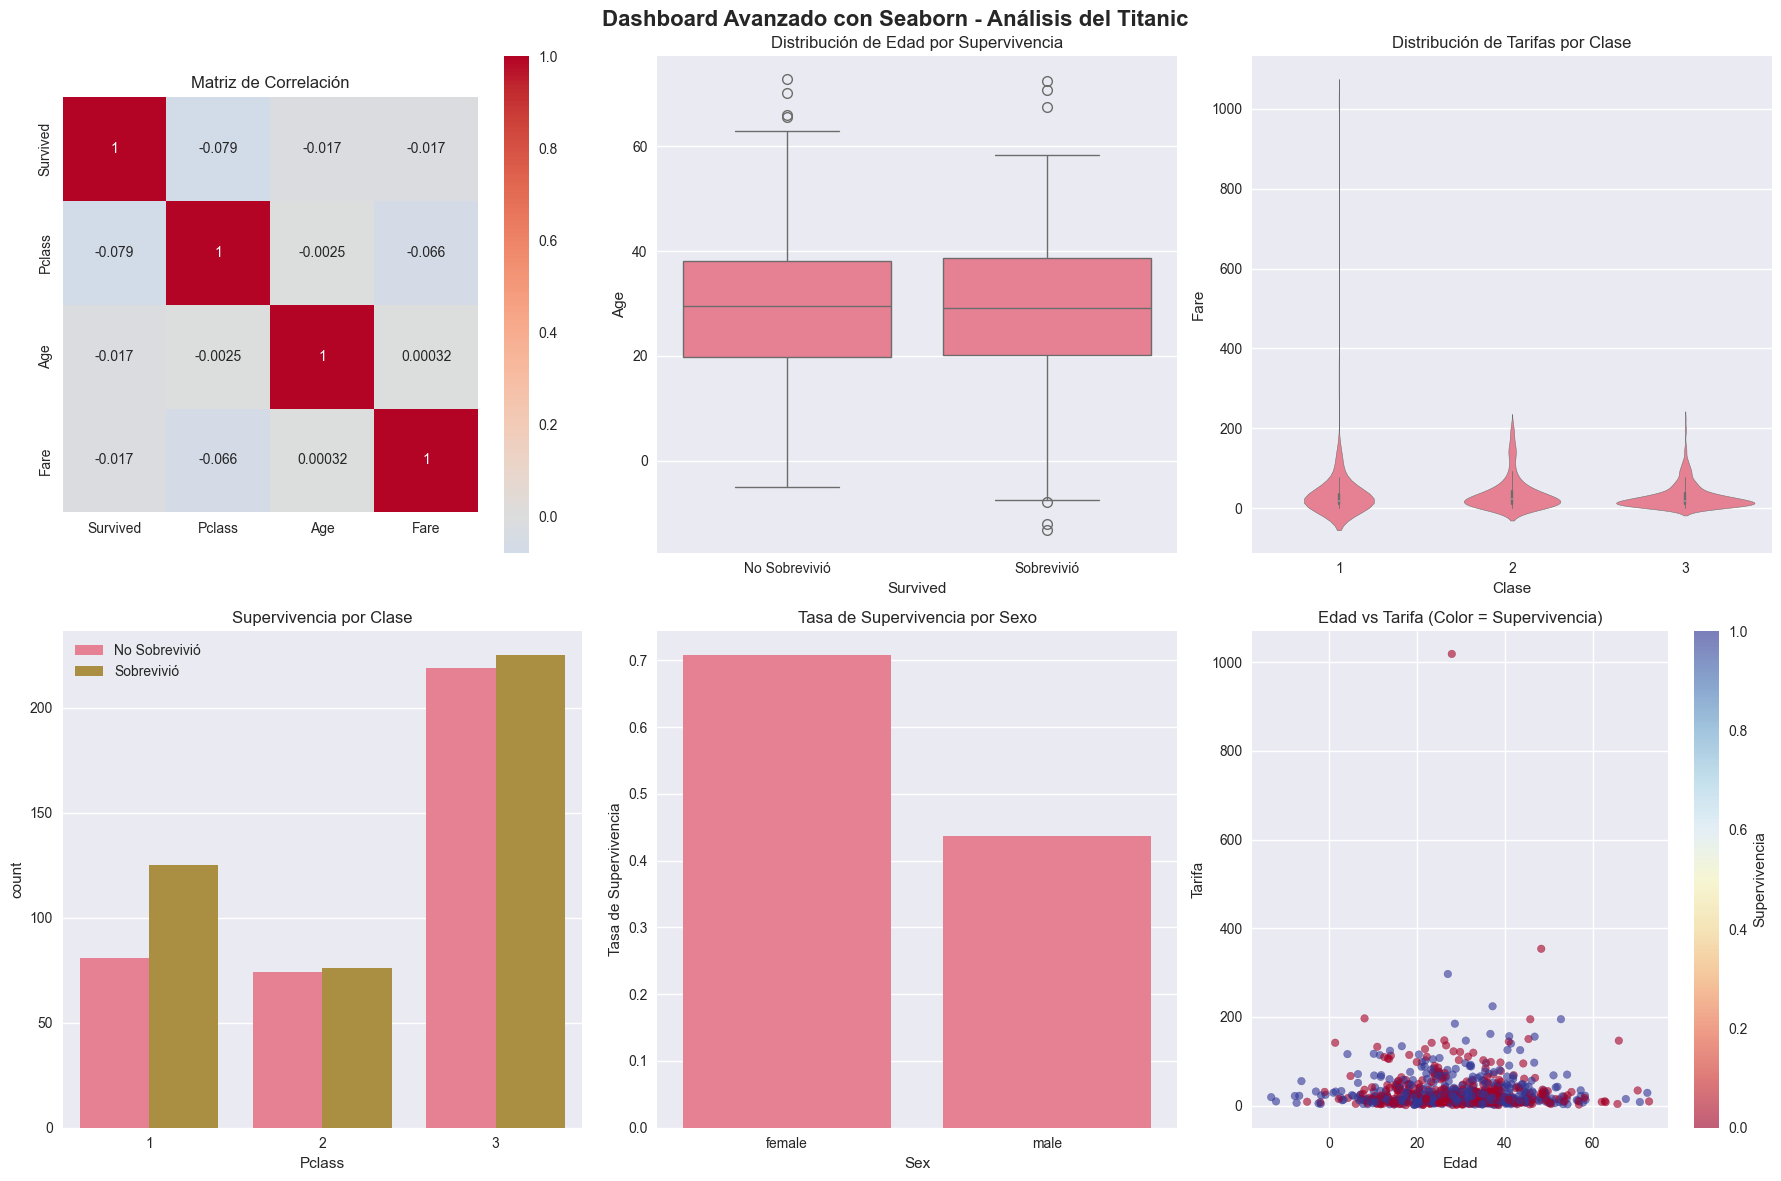

✅ Dashboard avanzado creado con seaborn


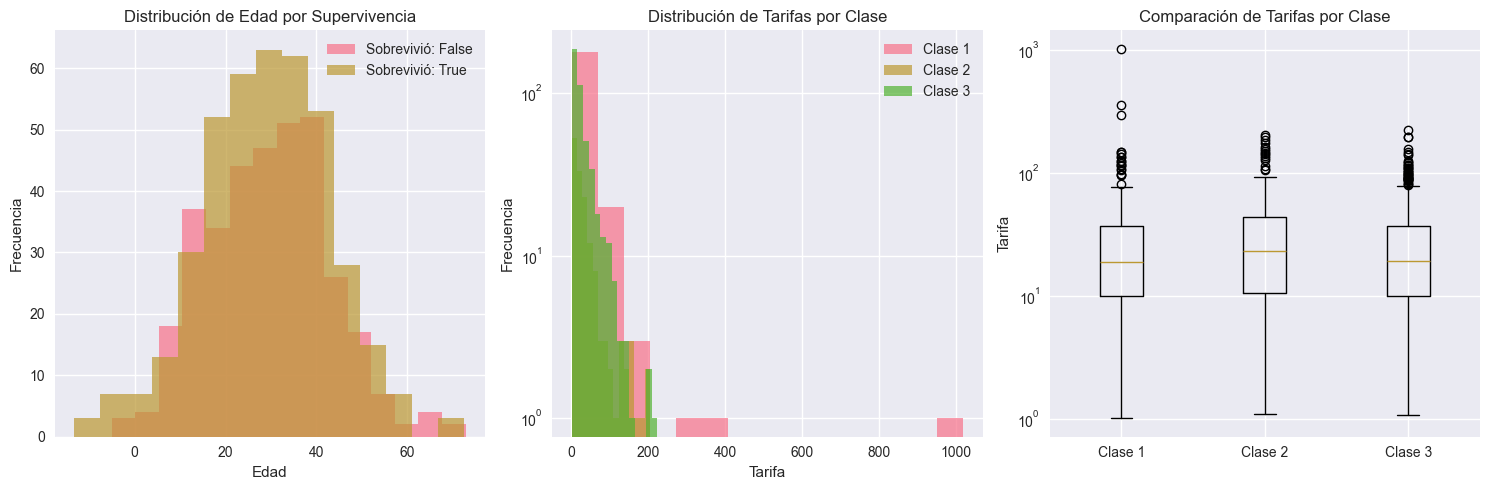

✅ Gráficos de distribución avanzados creados


<Figure size 1200x800 with 0 Axes>

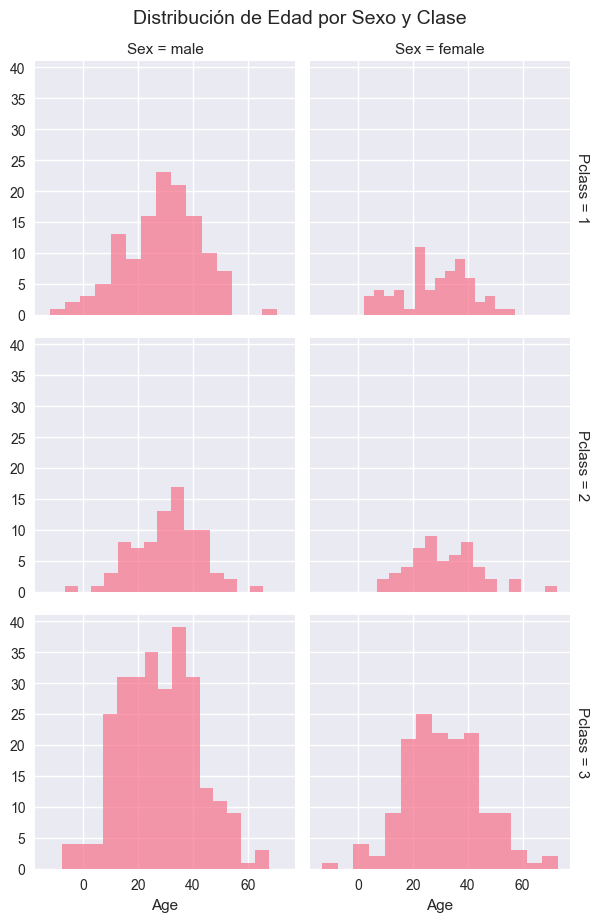

✅ Análisis multidimensional completado


In [3]:
# Visualizaciones Avanzadas con Seaborn

print("=== VISUALIZACIONES AVANZADAS CON SEABORN ===\n")

# 1. Heatmap de correlaciones
plt.figure(figsize=(15, 12))

# Crear subplot layout
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Dashboard Avanzado con Seaborn - Análisis del Titanic', fontsize=16, fontweight='bold')

# Preparar datos numéricos para correlación
df_numeric = df[['Survived', 'Pclass', 'Age', 'Fare']].copy()

# Subplot 1: Heatmap de correlación
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, ax=axes[0,0])
axes[0,0].set_title('Matriz de Correlación')

# Subplot 2: Boxplot - Supervivencia vs Edad
sns.boxplot(data=df, x='Survived', y='Age', ax=axes[0,1])
axes[0,1].set_title('Distribución de Edad por Supervivencia')
axes[0,1].set_xticklabels(['No Sobrevivió', 'Sobrevivió'])

# Subplot 3: Violin plot - Clase vs Tarifa
sns.violinplot(data=df, x='Pclass', y='Fare', ax=axes[0,2])
axes[0,2].set_title('Distribución de Tarifas por Clase')
axes[0,2].set_xlabel('Clase')

# Subplot 4: Count plot - Supervivencia por sexo y clase
sns.countplot(data=df, x='Pclass', hue='Survived', ax=axes[1,0])
axes[1,0].set_title('Supervivencia por Clase')
axes[1,0].legend(['No Sobrevivió', 'Sobrevivió'])

# Subplot 5: Bar plot - Tasa de supervivencia por sexo
supervivencia_por_sexo = df.groupby('Sex')['Survived'].mean().reset_index()
sns.barplot(data=supervivencia_por_sexo, x='Sex', y='Survived', ax=axes[1,1])
axes[1,1].set_title('Tasa de Supervivencia por Sexo')
axes[1,1].set_ylabel('Tasa de Supervivencia')

# Subplot 6: Scatter plot - Edad vs Tarifa coloreado por supervivencia
scatter = axes[1,2].scatter(df['Age'], df['Fare'], c=df['Survived'], 
                           cmap='RdYlBu', alpha=0.6, s=30)
axes[1,2].set_title('Edad vs Tarifa (Color = Supervivencia)')
axes[1,2].set_xlabel('Edad')
axes[1,2].set_ylabel('Tarifa')

# Agregar colorbar para el scatter plot
plt.colorbar(scatter, ax=axes[1,2], label='Supervivencia')

plt.tight_layout()
plt.show()

print("✅ Dashboard avanzado creado con seaborn")

# 2. Gráfico de distribución avanzado
plt.figure(figsize=(15, 5))

# Distribución de edad por supervivencia
plt.subplot(1, 3, 1)
for survived in [0, 1]:
    subset = df[df['Survived'] == survived]['Age'].dropna()
    plt.hist(subset, alpha=0.7, label=f'Sobrevivió: {bool(survived)}', bins=15)
plt.title('Distribución de Edad por Supervivencia')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.legend()

# Distribución de tarifa por clase
plt.subplot(1, 3, 2)
for clase in [1, 2, 3]:
    subset = df[df['Pclass'] == clase]['Fare'].dropna()
    plt.hist(subset, alpha=0.7, label=f'Clase {clase}', bins=15)
plt.title('Distribución de Tarifas por Clase')
plt.xlabel('Tarifa')
plt.ylabel('Frecuencia')
plt.legend()
plt.yscale('log')  # Escala logarítmica para mejor visualización

# Box plot comparativo
plt.subplot(1, 3, 3)
data_boxplot = [df[df['Pclass'] == clase]['Fare'].dropna() for clase in [1, 2, 3]]
plt.boxplot(data_boxplot, labels=['Clase 1', 'Clase 2', 'Clase 3'])
plt.title('Comparación de Tarifas por Clase')
plt.ylabel('Tarifa')
plt.yscale('log')

plt.tight_layout()
plt.show()

print("✅ Gráficos de distribución avanzados creados")

# 3. Análisis de patrones con seaborn
plt.figure(figsize=(12, 8))

# FacetGrid para análisis multidimensional
g = sns.FacetGrid(df, col='Sex', row='Pclass', margin_titles=True, height=3)
g.map(plt.hist, 'Age', bins=15, alpha=0.7)
g.add_legend()
plt.suptitle('Distribución de Edad por Sexo y Clase', y=1.02, fontsize=14)
plt.show()

print("✅ Análisis multidimensional completado")

## 🎯 Buenas Prácticas de Visualización

Una visualización efectiva no solo muestra datos, sino que cuenta una historia clara y ayuda a tomar decisiones informadas. Aquí aprenderás los principios fundamentales para crear gráficos profesionales y efectivos.

### Principios Fundamentales 📋

#### 1. **Claridad antes que Complejidad** 💎
- **Simplicidad**: Un gráfico simple y claro es mejor que uno complejo y confuso
- **Propósito**: Cada elemento debe tener un propósito específico
- **Enfoque**: Una visualización = una idea principal

#### 2. **Elección del Gráfico Correcto** 📊
- **Comparación**: Barras horizontales/verticales
- **Tendencias**: Líneas de tiempo
- **Distribución**: Histogramas, box plots
- **Correlación**: Scatter plots
- **Composición**: Pie charts (solo para pocas categorías)
- **Ubicación**: Mapas geográficos

#### 3. **Elementos de Diseño Efectivo** 🎨
- **Colores**: Usar paletas coherentes y accesibles
- **Tipografía**: Fuentes legibles y jerarquía clara
- **Espaciado**: Evitar el desorden visual
- **Contraste**: Resaltar lo importante

#### 4. **Honestidad con los Datos** ⚖️
- **Escalas apropiadas**: No distorsionar la realidad
- **Contexto completo**: Mostrar toda la información relevante
- **Transparencia**: Indicar limitaciones y fuentes

### Errores Comunes a Evitar ❌

1. **Gráficos de pie con muchas categorías** (más de 5-7)
2. **Escalas que no empiezan en cero** sin justificación
3. **Colores que no son accesibles** para daltónicos
4. **Demasiada información** en un solo gráfico
5. **Falta de títulos y etiquetas** descriptivos
6. **Gráficos 3D innecesarios** que dificultan la lectura

=== BUENAS PRÁCTICAS DE VISUALIZACIÓN ===

🔄 COMPARACIÓN: MALAS vs BUENAS PRÁCTICAS


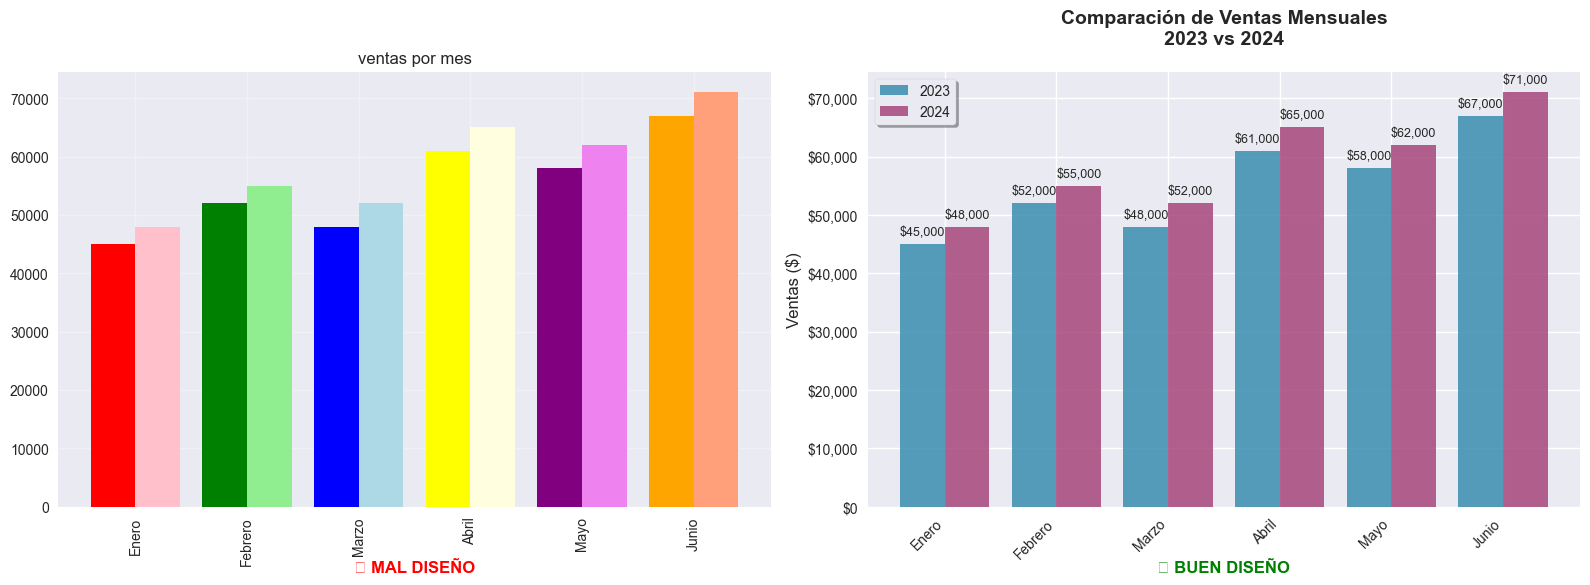

✅ Ejemplo 1 completado: Gráficos de barras




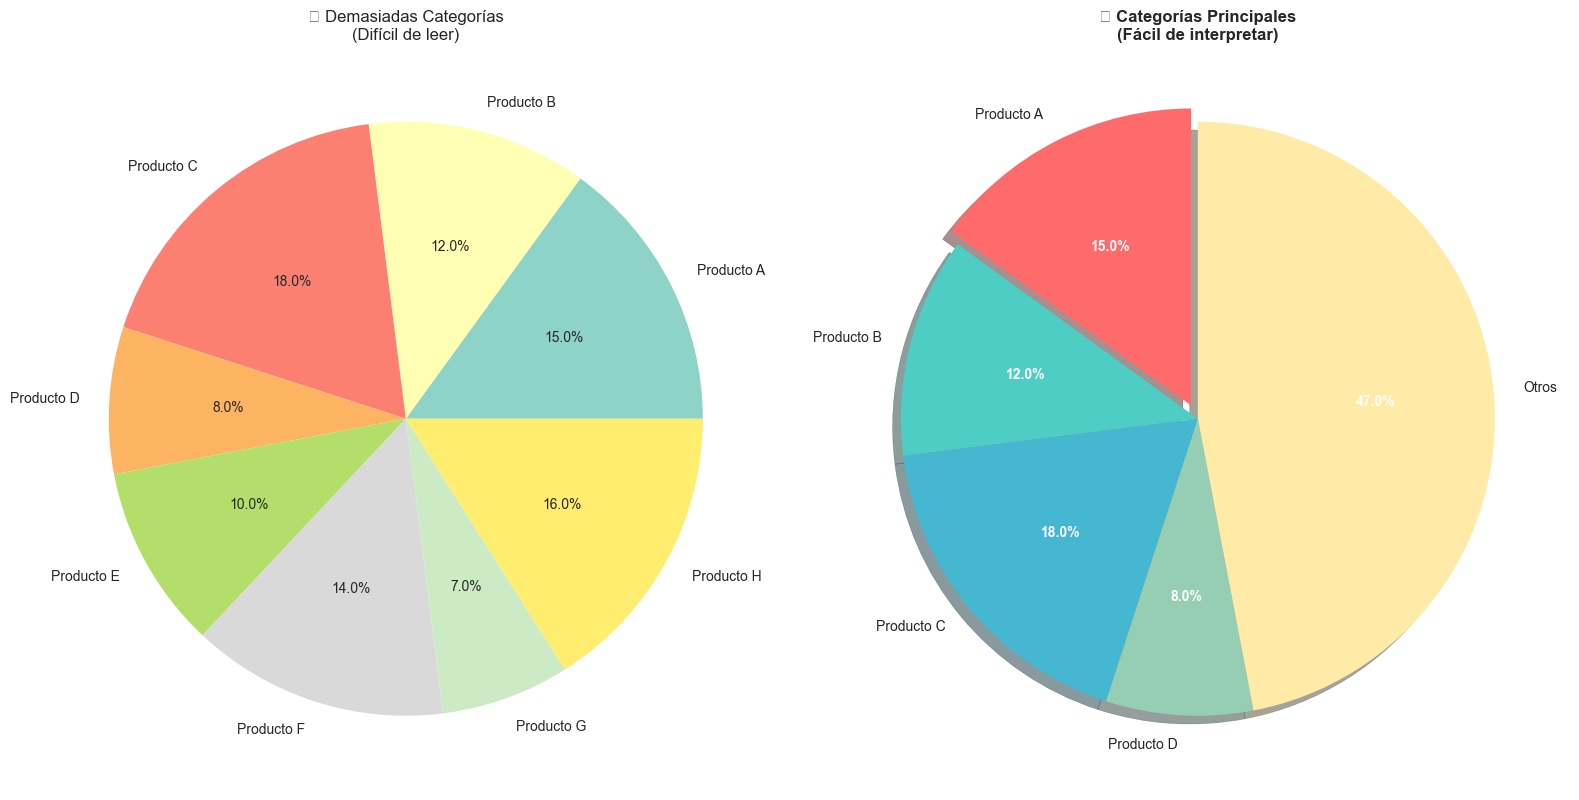

✅ Ejemplo 2 completado: Gráficos de pastel




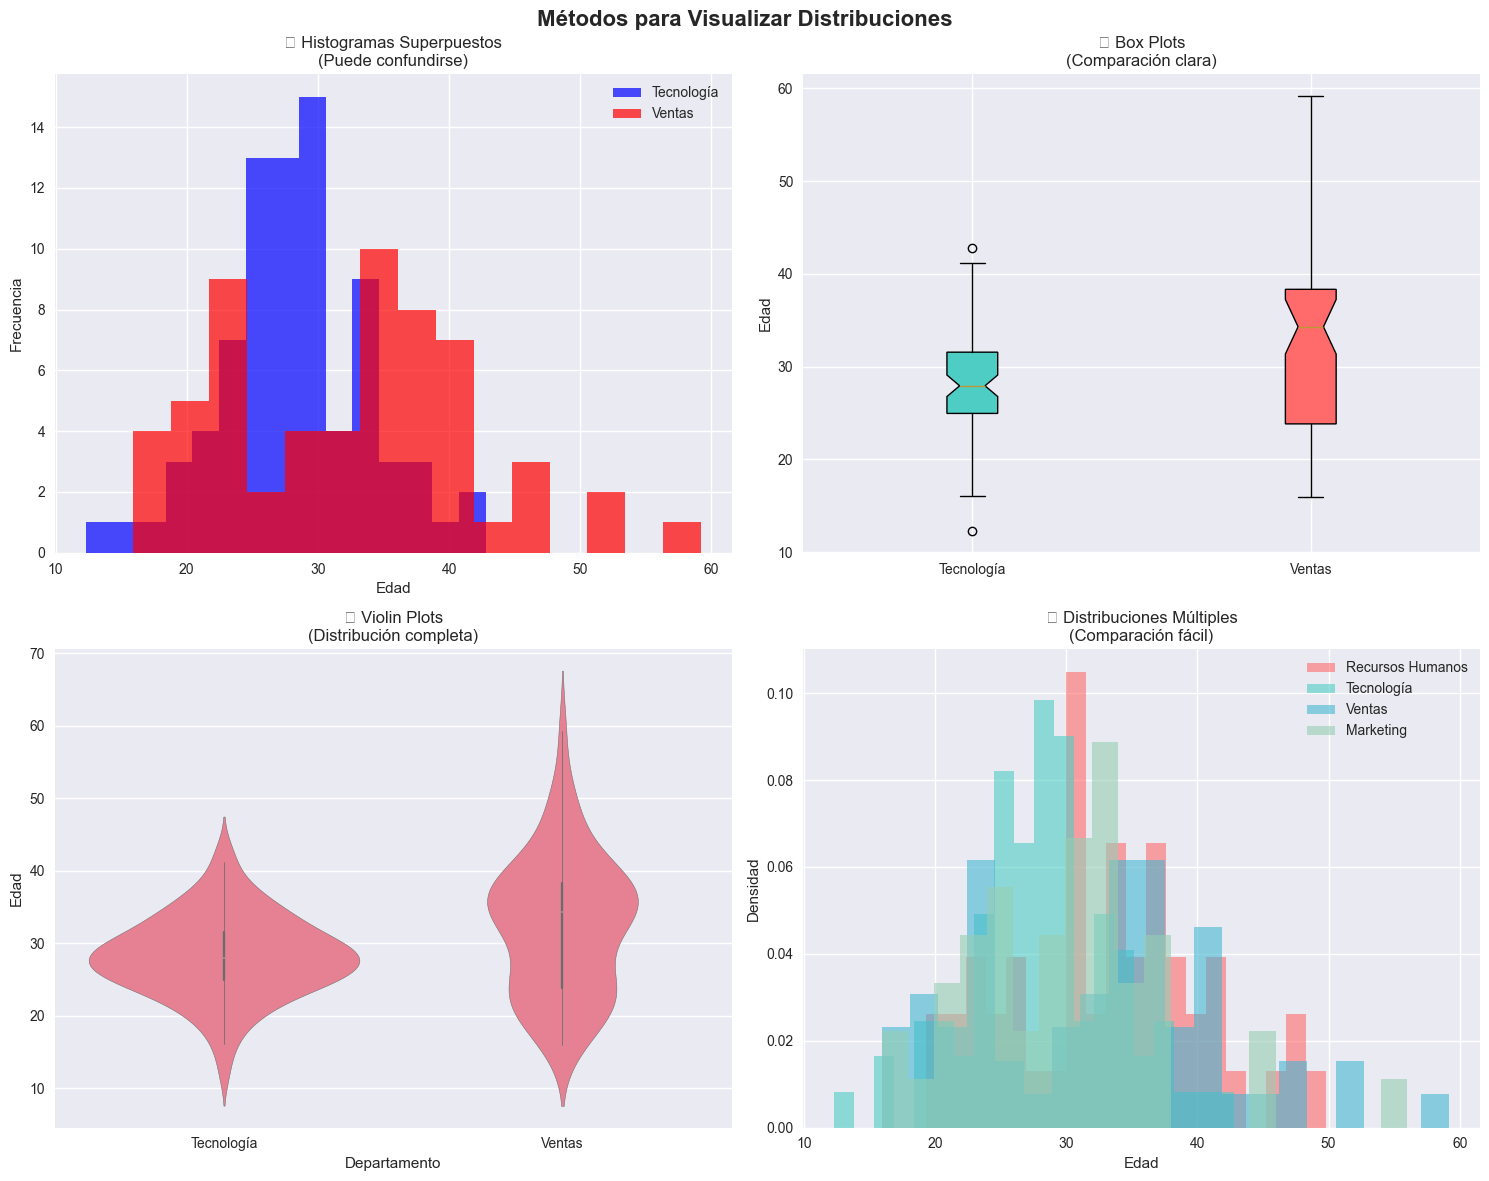

✅ Ejemplo 3 completado: Visualización de distribuciones



In [7]:
# Ejemplos Prácticos: Buenas vs Malas Prácticas

print("=== BUENAS PRÁCTICAS DE VISUALIZACIÓN ===\n")

# Preparar datos de ejemplo para las demostraciones
ventas_mensuales = {
    'Mes': ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio'],
    'Ventas_2023': [45000, 52000, 48000, 61000, 58000, 67000],
    'Ventas_2024': [48000, 55000, 52000, 65000, 62000, 71000]
}

df_ventas = pd.DataFrame(ventas_mensuales)

# Datos de distribución de edades por departamentos
np.random.seed(42)
departamentos = {
    'Recursos Humanos': np.random.normal(35, 8, 50),
    'Tecnología': np.random.normal(28, 6, 80),
    'Ventas': np.random.normal(32, 10, 60),
    'Marketing': np.random.normal(29, 7, 45)
}

print("🔄 COMPARACIÓN: MALAS vs BUENAS PRÁCTICAS")
print("=" * 45)

# EJEMPLO 1: Gráfico de barras - Malo vs Bueno
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# ❌ MALO: Gráfico confuso y mal diseñado
x_pos = np.arange(len(df_ventas['Mes']))
ax1.bar(x_pos - 0.2, df_ventas['Ventas_2023'], 0.4, 
        color=['red', 'green', 'blue', 'yellow', 'purple', 'orange'])
ax1.bar(x_pos + 0.2, df_ventas['Ventas_2024'], 0.4,
        color=['pink', 'lightgreen', 'lightblue', 'lightyellow', 'violet', 'lightsalmon'])
ax1.set_xticks(x_pos)
ax1.set_xticklabels(df_ventas['Mes'], rotation=90)
ax1.set_title('ventas por mes')  # Título sin formato
ax1.grid(True, alpha=0.3)

# ✅ BUENO: Gráfico claro y profesional
colors = ['#2E86AB', '#A23B72']  # Paleta coherente
ax2.bar(x_pos - 0.2, df_ventas['Ventas_2023'], 0.4, 
        label='2023', color=colors[0], alpha=0.8)
ax2.bar(x_pos + 0.2, df_ventas['Ventas_2024'], 0.4,
        label='2024', color=colors[1], alpha=0.8)

ax2.set_xticks(x_pos)
ax2.set_xticklabels(df_ventas['Mes'], rotation=45, ha='right')
ax2.set_title('Comparación de Ventas Mensuales\n2023 vs 2024', 
              fontsize=14, fontweight='bold', pad=20)
ax2.set_ylabel('Ventas ($)', fontsize=12)
ax2.legend(frameon=True, fancybox=True, shadow=True)

# Agregar valores en las barras (solo en el bueno)
for i, (v2023, v2024) in enumerate(zip(df_ventas['Ventas_2023'], df_ventas['Ventas_2024'])):
    ax2.text(i-0.2, v2023 + 1000, f'${v2023:,}', ha='center', va='bottom', fontsize=9)
    ax2.text(i+0.2, v2024 + 1000, f'${v2024:,}', ha='center', va='bottom', fontsize=9)

# Formatear el eje Y con formato de moneda
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Títulos de los subplots
ax1.text(0.5, -0.15, '❌ MAL DISEÑO', transform=ax1.transAxes, 
         ha='center', fontsize=12, color='red', fontweight='bold')
ax2.text(0.5, -0.15, '✅ BUEN DISEÑO', transform=ax2.transAxes, 
         ha='center', fontsize=12, color='green', fontweight='bold')

plt.tight_layout()
plt.show()

print("✅ Ejemplo 1 completado: Gráficos de barras")

print("\n" + "="*70 + "\n")

# EJEMPLO 2: Gráfico de pastel - Cuándo SÍ y cuándo NO usarlo
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# ❌ MALO: Demasiadas categorías en pie chart
categorias_muchas = ['Producto A', 'Producto B', 'Producto C', 'Producto D', 
                     'Producto E', 'Producto F', 'Producto G', 'Producto H']
ventas_muchas = [15, 12, 18, 8, 10, 14, 7, 16]

ax1.pie(ventas_muchas, labels=categorias_muchas, autopct='%1.1f%%',
        colors=plt.cm.Set3(np.linspace(0, 1, len(categorias_muchas))))
ax1.set_title('❌ Demasiadas Categorías\n(Difícil de leer)')

# ✅ BUENO: Pocas categorías principales + "Otros"
# Agrupar categorías pequeñas
ventas_principales = ventas_muchas[:4]
otros = sum(ventas_muchas[4:])
categorias_simples = categorias_muchas[:4] + ['Otros']
ventas_simples = ventas_principales + [otros]

# Colores más profesionales
colores_pro = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']

wedges, texts, autotexts = ax2.pie(ventas_simples, labels=categorias_simples, 
                                  autopct='%1.1f%%', colors=colores_pro,
                                  explode=(0.05, 0, 0, 0, 0),  # Resaltar el más importante
                                  shadow=True, startangle=90)

# Mejorar el formato del texto
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

ax2.set_title('✅ Categorías Principales\n(Fácil de interpretar)', 
              fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("✅ Ejemplo 2 completado: Gráficos de pastel")

print("\n" + "="*70 + "\n")

# EJEMPLO 3: Visualización de distribuciones - Comparación de métodos
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Métodos para Visualizar Distribuciones', fontsize=16, fontweight='bold')

# Preparar datos
edades_tech = departamentos['Tecnología']
edades_ventas = departamentos['Ventas']

# 1. Histogramas superpuestos (puede ser confuso)
axes[0,0].hist(edades_tech, alpha=0.7, bins=15, label='Tecnología', color='blue')
axes[0,0].hist(edades_ventas, alpha=0.7, bins=15, label='Ventas', color='red')
axes[0,0].set_title('❌ Histogramas Superpuestos\n(Puede confundirse)')
axes[0,0].legend()
axes[0,0].set_xlabel('Edad')
axes[0,0].set_ylabel('Frecuencia')

# 2. Box plots lado a lado (más claro)
data_box = [edades_tech, edades_ventas]
bp = axes[0,1].boxplot(data_box, labels=['Tecnología', 'Ventas'], 
                       patch_artist=True, notch=True)
bp['boxes'][0].set_facecolor('#4ECDC4')
bp['boxes'][1].set_facecolor('#FF6B6B')
axes[0,1].set_title('✅ Box Plots\n(Comparación clara)')
axes[0,1].set_ylabel('Edad')

# 3. Violin plots (información más rica)
violin_data = pd.DataFrame({
    'Edad': np.concatenate([edades_tech, edades_ventas]),
    'Departamento': ['Tecnología']*len(edades_tech) + ['Ventas']*len(edades_ventas)
})
sns.violinplot(data=violin_data, x='Departamento', y='Edad', ax=axes[1,0])
axes[1,0].set_title('✅ Violin Plots\n(Distribución completa)')

# 4. Ridge plot simulation con múltiples histogramas
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
for i, (dept, ages) in enumerate(departamentos.items()):
    axes[1,1].hist(ages, alpha=0.6, bins=20, label=dept, 
                   color=colors[i], density=True)
axes[1,1].set_title('✅ Distribuciones Múltiples\n(Comparación fácil)')
axes[1,1].legend()
axes[1,1].set_xlabel('Edad')
axes[1,1].set_ylabel('Densidad')

plt.tight_layout()
plt.show()

print("✅ Ejemplo 3 completado: Visualización de distribuciones")

print("\n" + "="*70)

### 🎨 Paletas de Colores y Accesibilidad

La elección de colores es crucial para crear visualizaciones efectivas y accesibles. Los colores deben ser significativos, distinguibles y accesibles para todos los usuarios.

#### Tipos de Paletas de Color 🌈

1. **Secuencial**: Para datos ordenados (claro → oscuro)
   - Ejemplo: Temperaturas, concentraciones, edades
   - Paletas: Blues, Greens, Reds

2. **Divergente**: Para datos con punto central significativo
   - Ejemplo: Correlaciones (-1 a +1), desviaciones de la media
   - Paletas: RdBu, RdYlGn, Spectral

3. **Cualitativa**: Para categorías sin orden específico
   - Ejemplo: Departamentos, países, productos
   - Paletas: Set1, Set2, Pastel

#### Principios de Accesibilidad 👥

- **Daltonismo**: ~8% de hombres y ~0.5% de mujeres lo padecen
- **Contraste suficiente**: Entre colores y fondo
- **No depender solo del color**: Usar formas, patrones, etiquetas
- **Probar con simuladores** de daltonismo

=== PALETAS DE COLORES Y ACCESIBILIDAD ===



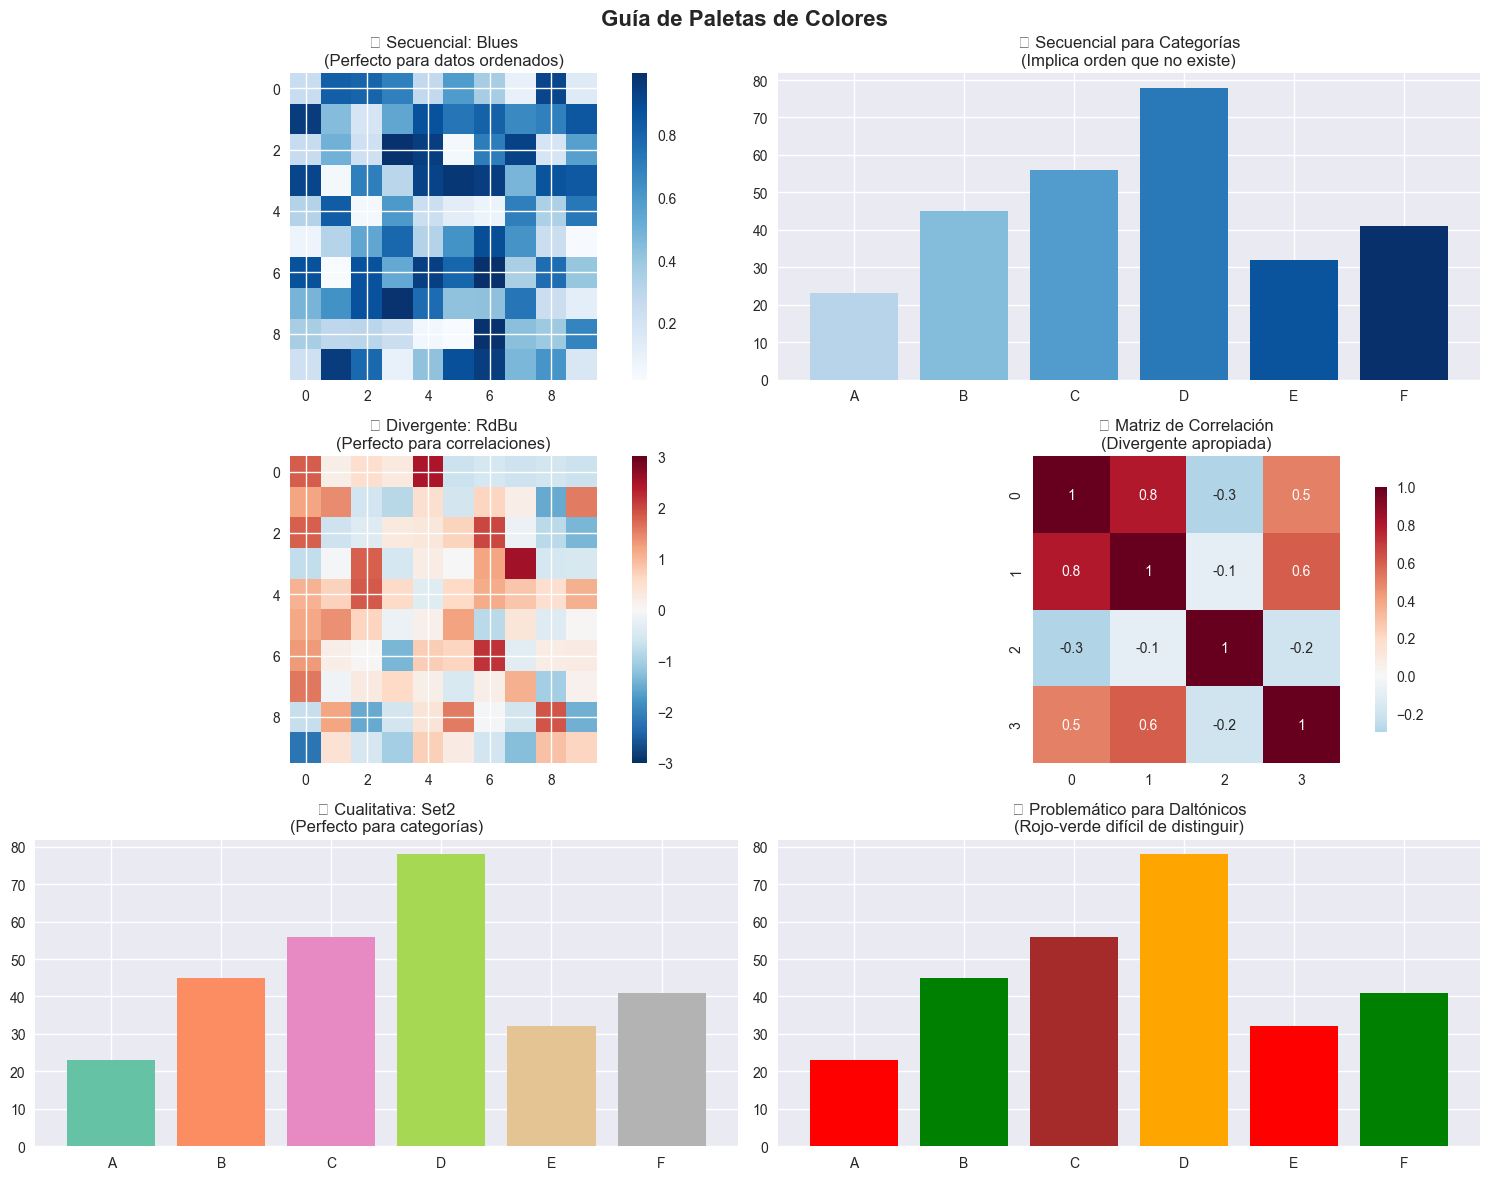

In [11]:
# Paletas de Colores y Accesibilidad

print("=== PALETAS DE COLORES Y ACCESIBILIDAD ===\n")

# 1. Demostración de diferentes tipos de paletas
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle('Guía de Paletas de Colores', fontsize=16, fontweight='bold')

# Datos de ejemplo para cada tipo de paleta
datos_secuencial = np.random.rand(10, 10)
datos_divergente = np.random.randn(10, 10)
categorias = ['A', 'B', 'C', 'D', 'E', 'F']
valores_categoricos = [23, 45, 56, 78, 32, 41]

# PALETAS SECUENCIALES
im1 = axes[0,0].imshow(datos_secuencial, cmap='Blues')
axes[0,0].set_title('✅ Secuencial: Blues\n(Perfecto para datos ordenados)')
plt.colorbar(im1, ax=axes[0,0])

# Paleta secuencial MAL usada para categorías
colores_secuenciales = plt.cm.Blues(np.linspace(0.3, 1, len(categorias)))
axes[0,1].bar(categorias, valores_categoricos, color=colores_secuenciales)
axes[0,1].set_title('❌ Secuencial para Categorías\n(Implica orden que no existe)')

# PALETAS DIVERGENTES
im2 = axes[1,0].imshow(datos_divergente, cmap='RdBu_r', vmin=-3, vmax=3)
axes[1,0].set_title('✅ Divergente: RdBu\n(Perfecto para correlaciones)')
plt.colorbar(im2, ax=axes[1,0])

# Ejemplo de datos de correlación
correlacion_ejemplo = np.array([
    [1.0, 0.8, -0.3, 0.5],
    [0.8, 1.0, -0.1, 0.6],
    [-0.3, -0.1, 1.0, -0.2],
    [0.5, 0.6, -0.2, 1.0]
])
sns.heatmap(correlacion_ejemplo, annot=True, cmap='RdBu_r', center=0,
            square=True, ax=axes[1,1], cbar_kws={'shrink': 0.8})
axes[1,1].set_title('✅ Matriz de Correlación\n(Divergente apropiada)')

# PALETAS CUALITATIVAS
colores_cualitativos = plt.cm.Set2(np.linspace(0, 1, len(categorias)))
axes[2,0].bar(categorias, valores_categoricos, color=colores_cualitativos)
axes[2,0].set_title('✅ Cualitativa: Set2\n(Perfecto para categorías)')

# Paleta problemática para daltónicos
colores_problematicos = ['red', 'green', 'brown', 'orange'][:len(categorias)]
axes[2,1].bar(categorias, valores_categoricos, color=colores_problematicos)
axes[2,1].set_title('❌ Problemático para Daltónicos\n(Rojo-verde difícil de distinguir)')

plt.tight_layout()
plt.show()





### 📖 Storytelling con Datos

Una buena visualización no solo muestra datos, sino que cuenta una historia convincente. El storytelling con datos combina análisis riguroso con narrativa efectiva para comunicar insights de manera memorable y accionable.

#### Estructura de una Historia con Datos 📚

1. **Contexto** 🎭
   - Establece la situación actual
   - Define el problema o pregunta
   - Presenta a los "personajes" (stakeholders)

2. **Conflicto** ⚡
   - Identifica el desafío o oportunidad
   - Muestra qué está en juego
   - Crea tensión o curiosidad

3. **Resolución** ✨
   - Presenta los hallazgos clave
   - Proporciona evidencia visual convincente
   - Sugiere acciones específicas

#### Técnicas Narrativas 🎬

- **Foco Progresivo**: Empezar general → ir a específico
- **Antes y Después**: Mostrar cambios en el tiempo
- **Comparaciones**: Benchmarking con competidores o estándares
- **Drill-down**: De resumen ejecutivo a detalles técnicos
- **Causa y Efecto**: Mostrar relaciones causales

#### Elementos Visuales de Storytelling 🎨

- **Anotaciones**: Explicar puntos importantes directamente en el gráfico
- **Colores estratégicos**: Resaltar elementos clave
- **Secuencia lógica**: Ordenar gráficos para construir el argumento
- **Jerarquía visual**: Guiar la atención del lector

=== STORYTELLING CON DATOS ===
Historia: 'La Transformación Digital de la Empresa XYZ'

🎭 ACTO 1: EL CONTEXTO


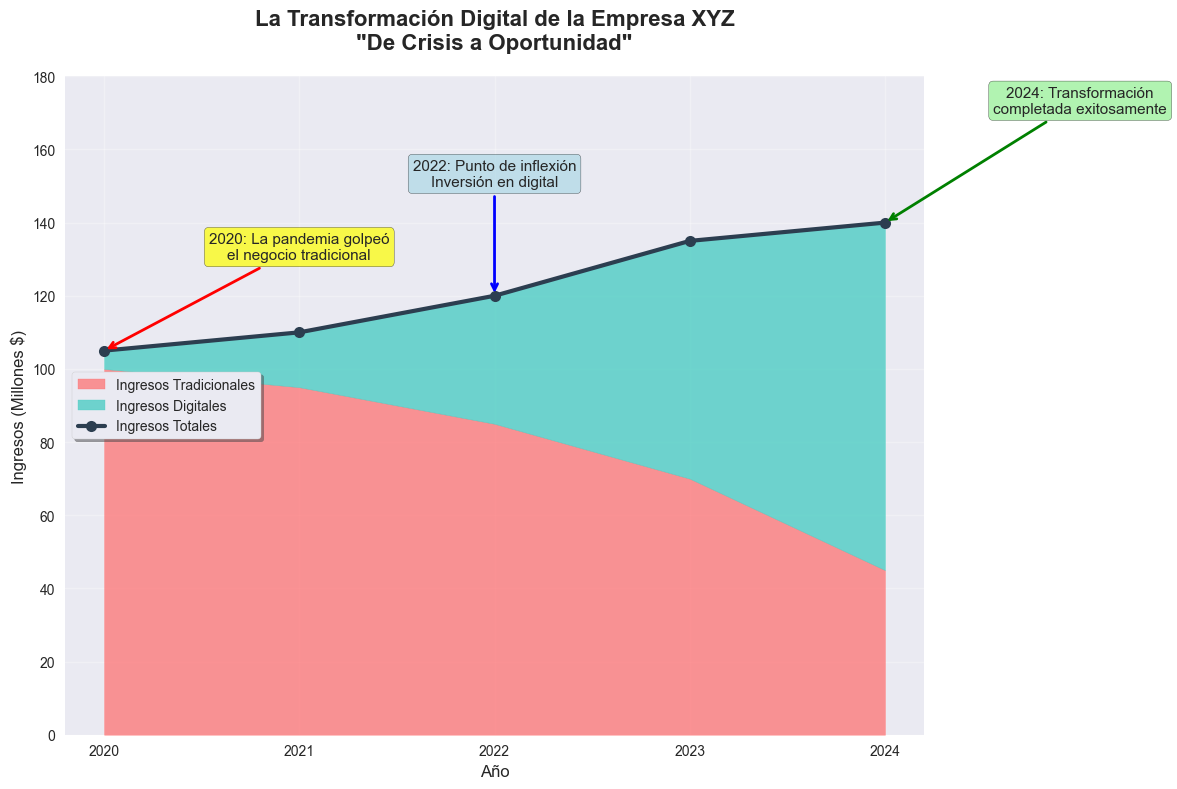

📊 CONTEXTO: La empresa enfrentó una crisis en 2020, pero logró una
   transformación exitosa diversificando hacia canales digitales.


⚡ ACTO 2: EL CONFLICTO


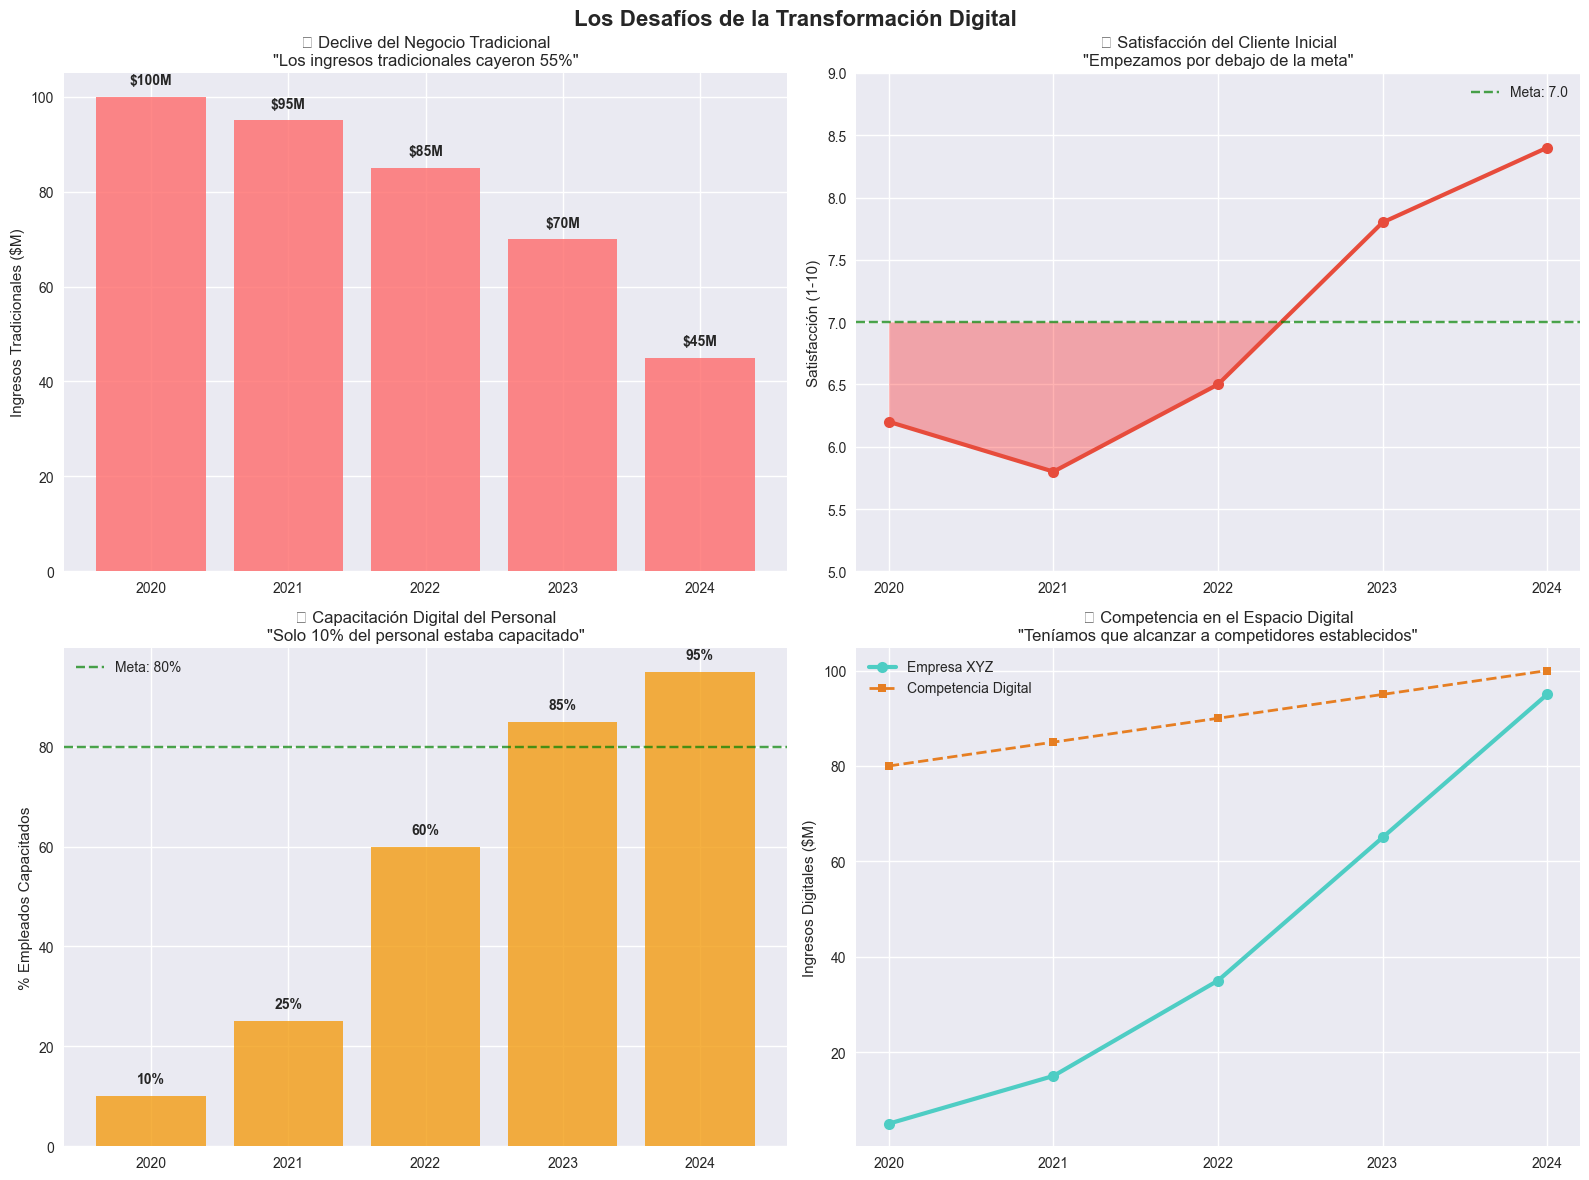

⚡ CONFLICTO: La empresa enfrentó múltiples desafíos simultáneos:
   • Declive de canales tradicionales
   • Baja satisfacción del cliente
   • Personal sin capacitación digital
   • Competencia establecida en digital


✨ ACTO 3: LA RESOLUCIÓN


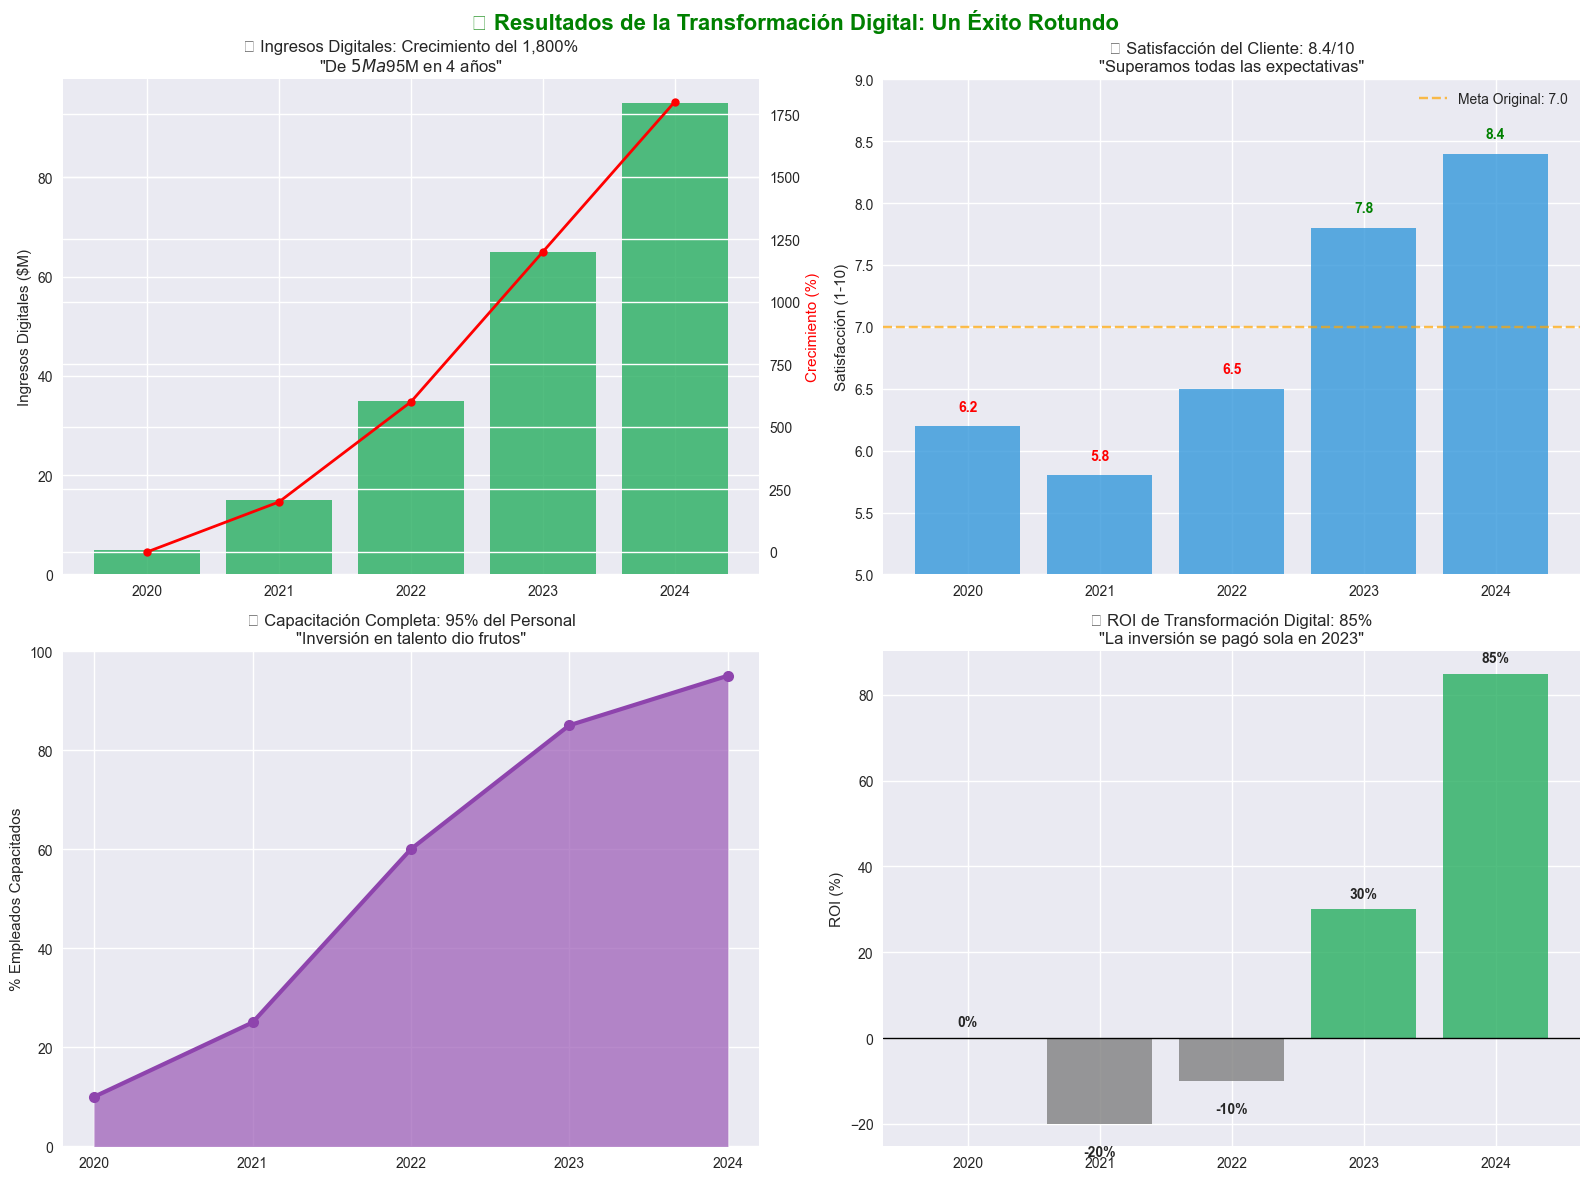

✨ RESOLUCIÓN: La estrategia de transformación digital fue un éxito:
   ✅ Crecimiento de 1,800% en ingresos digitales
   ✅ Satisfacción del cliente subió de 6.2 a 8.4
   ✅ 95% del personal capacitado en herramientas digitales
   ✅ ROI del 85% en la inversión de transformación

🎯 CONCLUSIÓN DE LA HISTORIA:
La empresa XYZ transformó una crisis en una oportunidad,
diversificando exitosamente hacia canales digitales e
invirtiendo en su talento humano. El resultado: una empresa
más resiliente, innovadora y rentable.



In [6]:
# Ejemplo de Storytelling con Datos: "El Turnaround de la Empresa XYZ"

print("=== STORYTELLING CON DATOS ===")
print("Historia: 'La Transformación Digital de la Empresa XYZ'\n")

# Datos simulados para la historia
import matplotlib.patches as mpatches

# Datos de la historia: transformación digital de 2020-2024
años = ['2020', '2021', '2022', '2023', '2024']
ingresos_tradicionales = [100, 95, 85, 70, 45]    # Declive del negocio tradicional
ingresos_digitales = [5, 15, 35, 65, 95]          # Crecimiento del negocio digital
satisfaccion_cliente = [6.2, 5.8, 6.5, 7.8, 8.4] # Mejora en satisfacción
empleados_capacitados = [10, 25, 60, 85, 95]      # % empleados capacitados en digital

# ACTO 1: CONTEXTO - La Situación Inicial
print("🎭 ACTO 1: EL CONTEXTO")
print("=" * 25)

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Gráfico de área apilada para mostrar la transición
ax.fill_between(años, 0, ingresos_tradicionales, 
                alpha=0.7, color='#FF6B6B', label='Ingresos Tradicionales')
ax.fill_between(años, ingresos_tradicionales, 
                [t+d for t,d in zip(ingresos_tradicionales, ingresos_digitales)],
                alpha=0.8, color='#4ECDC4', label='Ingresos Digitales')

# Línea de ingresos totales
ingresos_totales = [t+d for t,d in zip(ingresos_tradicionales, ingresos_digitales)]
ax.plot(años, ingresos_totales, 'o-', color='#2C3E50', linewidth=3, 
        markersize=8, label='Ingresos Totales')

# Anotaciones para storytelling
ax.annotate('2020: La pandemia golpeó\nel negocio tradicional', 
            xy=('2020', 105), xytext=('2021', 130),
            arrowprops=dict(arrowstyle='->', color='red', lw=2),
            fontsize=11, ha='center',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow', alpha=0.7))

ax.annotate('2022: Punto de inflexión\nInversión en digital', 
            xy=('2022', 120), xytext=('2022', 150),
            arrowprops=dict(arrowstyle='->', color='blue', lw=2),
            fontsize=11, ha='center',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='lightblue', alpha=0.7))

ax.annotate('2024: Transformación\ncompletada exitosamente', 
            xy=('2024', 140), xytext=('2023.2', 170),
            arrowprops=dict(arrowstyle='->', color='green', lw=2),
            fontsize=11, ha='center',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='lightgreen', alpha=0.7))

ax.set_title('La Transformación Digital de la Empresa XYZ\n"De Crisis a Oportunidad"', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Año', fontsize=12)
ax.set_ylabel('Ingresos (Millones $)', fontsize=12)
ax.legend(loc='center left', frameon=True, fancybox=True, shadow=True)
ax.grid(True, alpha=0.3)
ax.set_ylim(0, 180)

plt.tight_layout()
plt.show()

print("📊 CONTEXTO: La empresa enfrentó una crisis en 2020, pero logró una")
print("   transformación exitosa diversificando hacia canales digitales.")

print("\n" + "="*70 + "\n")

# ACTO 2: CONFLICTO - Los Desafíos
print("⚡ ACTO 2: EL CONFLICTO")
print("=" * 25)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Los Desafíos de la Transformación Digital', fontsize=16, fontweight='bold')

# Desafío 1: Declive de canales tradicionales
ax1.bar(años, ingresos_tradicionales, color='#FF6B6B', alpha=0.8)
ax1.set_title('❌ Declive del Negocio Tradicional\n"Los ingresos tradicionales cayeron 55%"')
ax1.set_ylabel('Ingresos Tradicionales ($M)')
for i, v in enumerate(ingresos_tradicionales):
    ax1.text(i, v + 2, f'${v}M', ha='center', va='bottom', fontweight='bold')

# Desafío 2: Baja satisfacción inicial
ax2.plot(años, satisfaccion_cliente, 'o-', color='#E74C3C', linewidth=3, markersize=8)
ax2.axhline(y=7, color='green', linestyle='--', alpha=0.7, label='Meta: 7.0')
ax2.fill_between(años, satisfaccion_cliente, 7, 
                 where=[s < 7 for s in satisfaccion_cliente], 
                 alpha=0.3, color='red', interpolate=True)
ax2.set_title('😞 Satisfacción del Cliente Inicial\n"Empezamos por debajo de la meta"')
ax2.set_ylabel('Satisfacción (1-10)')
ax2.legend()
ax2.set_ylim(5, 9)

# Desafío 3: Necesidad de capacitación
ax3.bar(años, empleados_capacitados, color='#F39C12', alpha=0.8)
ax3.axhline(y=80, color='green', linestyle='--', alpha=0.7, label='Meta: 80%')
ax3.set_title('🎓 Capacitación Digital del Personal\n"Solo 10% del personal estaba capacitado"')
ax3.set_ylabel('% Empleados Capacitados')
ax3.legend()
for i, v in enumerate(empleados_capacitados):
    ax3.text(i, v + 2, f'{v}%', ha='center', va='bottom', fontweight='bold')

# Desafío 4: Competencia en ingresos
competencia_digitales = [80, 85, 90, 95, 100]  # Competencia ya establecida
ax4.plot(años, ingresos_digitales, 'o-', color='#4ECDC4', linewidth=3, 
         markersize=8, label='Empresa XYZ')
ax4.plot(años, competencia_digitales, 's--', color='#E67E22', linewidth=2, 
         markersize=6, label='Competencia Digital')
ax4.set_title('🏁 Competencia en el Espacio Digital\n"Teníamos que alcanzar a competidores establecidos"')
ax4.set_ylabel('Ingresos Digitales ($M)')
ax4.legend()

plt.tight_layout()
plt.show()

print("⚡ CONFLICTO: La empresa enfrentó múltiples desafíos simultáneos:")
print("   • Declive de canales tradicionales")
print("   • Baja satisfacción del cliente") 
print("   • Personal sin capacitación digital")
print("   • Competencia establecida en digital")

print("\n" + "="*70 + "\n")

# ACTO 3: RESOLUCIÓN - El Éxito
print("✨ ACTO 3: LA RESOLUCIÓN")
print("=" * 25)

# Dashboard de éxito con métricas clave
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('🎉 Resultados de la Transformación Digital: Un Éxito Rotundo', 
             fontsize=16, fontweight='bold', color='green')

# Éxito 1: Crecimiento exponencial digital
ax1.bar(años, ingresos_digitales, color='#27AE60', alpha=0.8)
crecimiento = [(ingresos_digitales[i]/ingresos_digitales[0]-1)*100 if ingresos_digitales[0] > 0 else 0 for i in range(len(ingresos_digitales))]
ax1_twin = ax1.twinx()
ax1_twin.plot(años, crecimiento, 'ro-', linewidth=2, markersize=6)
ax1_twin.set_ylabel('Crecimiento (%)', color='red')
ax1.set_title('📈 Ingresos Digitales: Crecimiento del 1,800%\n"De $5M a $95M en 4 años"')
ax1.set_ylabel('Ingresos Digitales ($M)')

# Éxito 2: Satisfacción récord
ax2.bar(años, satisfaccion_cliente, color='#3498DB', alpha=0.8)
ax2.axhline(y=7, color='orange', linestyle='--', alpha=0.7, label='Meta Original: 7.0')
ax2.set_title('😊 Satisfacción del Cliente: 8.4/10\n"Superamos todas las expectativas"')
ax2.set_ylabel('Satisfacción (1-10)')
ax2.legend()
ax2.set_ylim(5, 9)
for i, v in enumerate(satisfaccion_cliente):
    color = 'red' if v < 7 else 'green'
    ax2.text(i, v + 0.1, f'{v}', ha='center', va='bottom', fontweight='bold', color=color)

# Éxito 3: Personal totalmente capacitado
ax3.fill_between(años, 0, empleados_capacitados, color='#9B59B6', alpha=0.7)
ax3.plot(años, empleados_capacitados, 'o-', color='#8E44AD', linewidth=3, markersize=8)
ax3.set_title('🎓 Capacitación Completa: 95% del Personal\n"Inversión en talento dio frutos"')
ax3.set_ylabel('% Empleados Capacitados')
ax3.set_ylim(0, 100)

# Éxito 4: ROI de la transformación
roi_inversion = [0, -20, -10, 30, 85]  # ROI de la inversión digital
colores_roi = ['gray' if x <= 0 else '#27AE60' for x in roi_inversion]
bars = ax4.bar(años, roi_inversion, color=colores_roi, alpha=0.8)
ax4.axhline(y=0, color='black', linewidth=1)
ax4.set_title('💰 ROI de Transformación Digital: 85%\n"La inversión se pagó sola en 2023"')
ax4.set_ylabel('ROI (%)')
for bar, value in zip(bars, roi_inversion):
    height = bar.get_height()
    label_y = height + 2 if height >= 0 else height - 5
    ax4.text(bar.get_x() + bar.get_width()/2., label_y, f'{value}%',
             ha='center', va='bottom' if height >= 0 else 'top', fontweight='bold')

plt.tight_layout()
plt.show()

print("✨ RESOLUCIÓN: La estrategia de transformación digital fue un éxito:")
print("   ✅ Crecimiento de 1,800% en ingresos digitales")
print("   ✅ Satisfacción del cliente subió de 6.2 a 8.4")
print("   ✅ 95% del personal capacitado en herramientas digitales")
print("   ✅ ROI del 85% en la inversión de transformación")

print("\n" + "="*50)
print("🎯 CONCLUSIÓN DE LA HISTORIA:")
print("=" * 30)
print("La empresa XYZ transformó una crisis en una oportunidad,")
print("diversificando exitosamente hacia canales digitales e")
print("invirtiendo en su talento humano. El resultado: una empresa")
print("más resiliente, innovadora y rentable.")

print("\n" + "="*70)

## ✅ Checklist de Buenas Prácticas

Usa esta lista de verificación antes de publicar o presentar tus visualizaciones:

### Antes de Empezar 🎯
- [ ] **¿Cuál es el objetivo principal?** Define qué insight quieres comunicar
- [ ] **¿Quién es tu audiencia?** Adapta el nivel de complejidad y contexto
- [ ] **¿Qué acción quieres que tomen?** Diseña para influir decisiones específicas

### Selección del Gráfico 📊
- [ ] **¿Elegiste el tipo correcto?** Barras para comparar, líneas para tendencias, etc.
- [ ] **¿Es la opción más simple?** Evita complejidad innecesaria
- [ ] **¿Facilita la comparación?** Los elementos importantes deben ser fáciles de comparar

### Diseño Visual 🎨
- [ ] **Título claro y específico** que comunique el insight principal
- [ ] **Etiquetas de ejes** descriptivas y con unidades apropiadas
- [ ] **Leyenda necesaria** ubicada lógicamente y fácil de relacionar
- [ ] **Colores significativos** que refuercen el mensaje, no lo distraigan
- [ ] **Texto legible** con tamaño apropiado para el medio de presentación

### Datos y Escalas 📏
- [ ] **Escalas apropiadas** que no distorsionen la realidad
- [ ] **Punto de referencia** (cero, promedio, meta) cuando sea relevante
- [ ] **Datos completos** o indicación clara de limitaciones
- [ ] **Fuente de datos** claramente identificada

### Accesibilidad 🌍
- [ ] **Colores accesibles** para personas con daltonismo
- [ ] **Contraste suficiente** entre elementos
- [ ] **No dependes solo del color** para transmitir información
- [ ] **Texto alternativo** para gráficos digitales

### Mensaje y Contexto 💡
- [ ] **Una idea principal** por visualización
- [ ] **Contexto suficiente** para entender la importancia
- [ ] **Llamadas a la acción** claras cuando sea apropiado
- [ ] **Historia coherente** que fluya lógicamente

### Revisión Final 🔍
- [ ] **Prueba con usuarios** reales de tu audiencia objetivo
- [ ] **Verifica en diferentes dispositivos** si es digital
- [ ] **Revisa la ortografía** y formato de números
- [ ] **¿Elimina o agrega valor?** Cada elemento debe tener un propósito

---

### 🏆 Principios de Oro para Recordar

1. **"Keep it Simple"** - La simplicidad es la máxima sofisticación
2. **"Show, Don't Tell"** - Deja que los datos hablen por sí mismos  
3. **"Context is King"** - Sin contexto, los datos no significan nada
4. **"Accessibility Always"** - Diseña para que todos puedan entender
5. **"Story First"** - Los gráficos deben servir a la narrativa, no al revés